# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import nltk
import re
plt.rcParams["figure.figsize"] = (12, 8) 

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# FETCH DATA

In [17]:
df_train = pd.read_csv('/content/drive/MyDrive/Upskill/project2/data/train.csv')
print(df_train.shape)

(1804874, 45)


In [18]:
df_train = df_train[["target", "comment_text"]]

In [19]:
df_train.head(10)

,target,comment_text
0,0.000000,"This is so cool. It's like, 'would you want yo..."
1,0.000000,Thank you!! This would make my life a lot less...
2,0.000000,This is such an urgent design problem; kudos t...
3,0.000000,Is this something I'll be able to install on m...
4,0.893617,haha you guys are a bunch of losers.
5,0.666667,ur a sh*tty comment.
6,0.457627,hahahahahahahahhha suck it.
7,0.000000,FFFFUUUUUUUUUUUUUUU
8,0.000000,The ranchers seem motivated by mostly by greed...
9,0.000000,It was a great show. Not a combo I'd of expect...


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


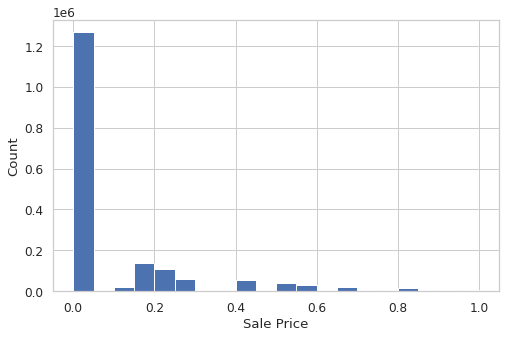

In [20]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df_train['target'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

# CLEANING TEXT DATA

## To Lower

In [21]:
df_train["comment_text"] = [text.lower() for text in df_train["comment_text"]]

In [22]:
df_train.head(10)

,target,comment_text
0,0.000000,"this is so cool. it's like, 'would you want yo..."
1,0.000000,thank you!! this would make my life a lot less...
2,0.000000,this is such an urgent design problem; kudos t...
3,0.000000,is this something i'll be able to install on m...
4,0.893617,haha you guys are a bunch of losers.
5,0.666667,ur a sh*tty comment.
6,0.457627,hahahahahahahahhha suck it.
7,0.000000,ffffuuuuuuuuuuuuuuu
8,0.000000,the ranchers seem motivated by mostly by greed...
9,0.000000,it was a great show. not a combo i'd of expect...


## Contractions

In [19]:
contraction_mapping = {
    "ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
    "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
    "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": 
    "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
    "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
    "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
    "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", 
    "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", 
    "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
    "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", 
    "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
    "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", 
    "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", 
    "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
    "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
    "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have",
    "Trump's": "trump is", "Obama's": "obama is", "Canada's": "canada is", "today's": "today is"
}

In [20]:
def clean_contractions(text):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    words = [contraction_mapping[word] if word in contraction_mapping else word for word in text.split(" ")]
    return ' '.join(words)

In [25]:
df_train["comment_text"] = [clean_contractions(text) for text in df_train["comment_text"]]

In [26]:
df_train.head(10)

,target,comment_text
0,0.000000,"this is so cool. it is like, 'would you want y..."
1,0.000000,thank you!! this would make my life a lot less...
2,0.000000,this is such an urgent design problem; kudos t...
3,0.000000,is this something i will be able to install on...
4,0.893617,haha you guys are a bunch of losers.
5,0.666667,ur a sh*tty comment.
6,0.457627,hahahahahahahahhha suck it.
7,0.000000,ffffuuuuuuuuuuuuuuu
8,0.000000,the ranchers seem motivated by mostly by greed...
9,0.000000,it was a great show. not a combo i would of ex...


## Special Characters

In [21]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'

In [22]:
specail_signs = { "…": "...", "₂": "2"}

In [23]:
def clean_special_chars(text):
    for s in specail_signs: 
        text = text.replace(s, specail_signs[s])
    for p in punct:
        text = text.replace(p, f' {p} ')
    return text

In [30]:
df_train["comment_text"] = [clean_special_chars(text) for text in df_train["comment_text"]]

In [31]:
df_train.head(10)

,target,comment_text
0,0.000000,"this is so cool . it is like , ' would yo..."
1,0.000000,thank you ! ! this would make my life a lot ...
2,0.000000,this is such an urgent design problem ; kudos...
3,0.000000,is this something i will be able to install on...
4,0.893617,haha you guys are a bunch of losers .
5,0.666667,ur a sh * tty comment .
6,0.457627,hahahahahahahahhha suck it .
7,0.000000,ffffuuuuuuuuuuuuuuu
8,0.000000,the ranchers seem motivated by mostly by greed...
9,0.000000,it was a great show . not a combo i would of ...


## Special Caps

In [24]:
special_caps_mapping = { 
    "ᴀ": "a", "ʙ": "b", "ᴄ": "c", "ᴅ": "d", "ᴇ": "e", "ғ": "f", "ɢ": "g", "ʜ": "h", "ɪ": "i", "ᴊ": "j", "ᴋ": "k", "ʟ": "l", "ᴍ": "m",
    "ɴ": "n", "ᴏ": "o", "ᴘ": "p", "ǫ": "q", "ʀ": "r", "s": "s", "ᴛ": "t", "ᴜ": "u", "ᴠ": "v", "ᴡ": "w", "x": "x", "ʏ": "y", "ᴢ": "z",
    "𝘊": "C", "𝘦": "e", "𝘳": "r", "𝘢": "a", "𝘵": "t", "𝘰": "o", "𝘤": "c", "𝘺": "y", "𝘴": "s", "𝘪": "i", "𝘧": "f", "𝘮": "m", "𝘣": "b",
    "м": "m", "υ": "u", "т": "t", "ѕ": "s", "𝙀": "E", "𝒛": "z", "𝑲": "K", "𝑳": "L", "𝑾": "W", "𝒋": "j", "𝟒": "4",
    "𝙒": "W", "𝘾": "C", "𝘽": "B", "𝑱": "J", "𝑹": "R", "𝑫": "D", "𝑵": "N", "𝑪": "C", "𝑯": "H", "𝒒": "q", "𝑮": "G", "𝗕": "B", "𝗴": "g", 
    "𝟐": "2", "𝗸": "k", "𝗟": "L", "𝗠": "M", "𝗷": "j", "𝐎": "O", "𝐍": "N", "𝐊": "K", "𝑭": "F", "Е": "E"
}

In [25]:
def clean_small_caps(text):
    for char in special_caps_mapping:
        text = text.replace(char, special_caps_mapping[char])
    return text

In [34]:
df_train["comment_text"] = [clean_small_caps(text) for text in df_train["comment_text"]]

In [35]:
df_train.head(10)

,target,comment_text
0,0.000000,"this is so cool . it is like , ' would yo..."
1,0.000000,thank you ! ! this would make my life a lot ...
2,0.000000,this is such an urgent design problem ; kudos...
3,0.000000,is this something i will be able to install on...
4,0.893617,haha you guys are a bunch of losers .
5,0.666667,ur a sh * tty comment .
6,0.457627,hahahahahahahahhha suck it .
7,0.000000,ffffuuuuuuuuuuuuuuu
8,0.000000,the ranchers seem motivated by mostly by greed...
9,0.000000,it was a great show . not a combo i would of ...


## Emojis

In [36]:
df_train.head(10)

,target,comment_text
0,0.000000,"this is so cool . it is like , ' would yo..."
1,0.000000,thank you ! ! this would make my life a lot ...
2,0.000000,this is such an urgent design problem ; kudos...
3,0.000000,is this something i will be able to install on...
4,0.893617,haha you guys are a bunch of losers .
5,0.666667,ur a sh * tty comment .
6,0.457627,hahahahahahahahhha suck it .
7,0.000000,ffffuuuuuuuuuuuuuuu
8,0.000000,the ranchers seem motivated by mostly by greed...
9,0.000000,it was a great show . not a combo i would of ...


In [26]:
emojis = "🍕🐵😑😢🐶️😜😎👊😁😍💖💵👎😀😂🔥😄🏻💥😋👏😱🚌ᴵ͞🌟😊😳😧🙀😐😕👍😮😃😘💩💯⛽🚄😖🏼🚲😟😈💪🙏🎯🌹😇💔😡👌🙄😠😉😤⛺🙂😏🍾🎉😞🏾😅😭👻😥😔😓🏽🎆🍻🍽🎶🌺🤔😪🐰🐇🐱🙆😨🙃💕💗💚🙈😴🏿🤗🇺🇸⤵🏆🎃😩👮💙🐾🐕😆🌠🐟💫💰💎🖐🙅⛲🍰🤐👆🙌💛🙁👀🙊🙉🚬🤓😵😒͝🆕👅👥👄🔄🔤👉👤👶👲🔛🎓😣⏺😌🤑🌏😯😲💞🚓🔔📚🏀👐💤🍇🏡❔⁉👠》🇹🇼🌸🌞🎲😛💋💀🎄💜🤢َِ🗑💃📣👿༼つ༽😰🤣🐝🎅🍺🎵🌎͟🤡🤥😬🤧🚀🤴😝💨🏈😺🌍⏏ệ🍔🐮🍁🍆🍑🌮🌯🤦🍀😫🤤🎼🕺🍸🥂🗽🎇🎊🆘🤠👩🖒🚪🇫🇷🇩🇪😷🇨🇦🌐📺🐋💘💓💐🌋🌄🌅👺🐷🚶🤘ͦ💸👂👃🎫🚢🚂🏃👽😙🎾👹⎌🏒⛸🏄🐀🚑🤷🤙🐒🐈ﷻ🦄🚗🐳👇⛷👋🦊🐽🎻🎹⛓🏹🍷🦆♾🎸🤕🤒⛑🎁🏝🦁🙋😶🔫👁💲🗯👑🚿💡😦🏐🇰🇵👾🐄🎈🔨🐎🤞🐸💟🎰🌝🛳🍭👣🏉💭🎥🐴👨🤳🦍🍩😗🏂👳🍗🕉🐲🍒🐑⏰💊🌤🍊🔹🤚🍎𝑷🐂💅💢💒🚴🖕🖤🥘📍👈➕🚫🎨🌑🐻🤖🎎😼🕷👼📉🍟🍦🌈🔭《🐊🐍🐦🐡💳ἱ🙇🥜🔼"

In [27]:
def remove_emojis(text):
    for emoji in emojis:
        text = text.replace(emoji, '')
    return text

In [39]:
df_train["comment_text"] = [remove_emojis(text) for text in df_train["comment_text"]]

In [40]:
df_train.head(10)

,target,comment_text
0,0.000000,"this is so cool . it is like , ' would yo..."
1,0.000000,thank you ! ! this would make my life a lot ...
2,0.000000,this is such an urgent design problem ; kudos...
3,0.000000,is this something i will be able to install on...
4,0.893617,haha you guys are a bunch of losers .
5,0.666667,ur a sh * tty comment .
6,0.457627,hahahahahahahahhha suck it .
7,0.000000,ffffuuuuuuuuuuuuuuu
8,0.000000,the ranchers seem motivated by mostly by greed...
9,0.000000,it was a great show . not a combo i would of ...


## Stemmer

In [28]:
stemmer = nltk.stem.PorterStemmer()

In [29]:
def cleaning(text):
    row = str(text)
    row = row.replace('\n', ' ')
    row = row.replace('\t', ' ')
    row = row.replace('\\', "")
    row = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', row)
    row = re.sub(' +', ' ', row)
    row = row.replace("।", "")
    row = re.sub('[1234567890]', '', row) 
    row = row.replace('’', '')
    row = row.replace('‘', '')
    
    row = row.split()
    row = [w for w in row]
    row = [stemmer.stem(w) for w in row]
    row = " ".join(row)
    return row

In [ ]:
df_train["comment_text"] = [cleaning(text) for text in df_train["comment_text"]]

In [ ]:
df_train.head(10)

In [ ]:
df_train.to_csv('/content/drive/MyDrive/Upskill/project2/data/train_clean.csv')

# TRAIN TEST SPLIT

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Upskill/project2/data/train_clean.csv')

In [3]:
df_train.head(10)

,Unnamed: 0,target,comment_text
0,0,0.000000,thi is so cool it is like would you want your ...
1,1,0.000000,thank you thi would make my life a lot less an...
2,2,0.000000,thi is such an urgent design problem kudo to y...
3,3,0.000000,is thi someth i will be abl to instal on my si...
4,4,0.893617,haha you guy are a bunch of loser
5,5,0.666667,ur a sh tti comment
6,6,0.457627,hahahahahahahahhha suck it
7,7,0.000000,ffffuuuuuuuuuuuuuuu
8,8,0.000000,the rancher seem motiv by mostli by greed no o...
9,9,0.000000,it wa a great show not a combo i would of expe...


In [4]:
x = df_train['comment_text']
y = df_train['target']
del df_train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13)

# VECTORIZER

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

# TRAIN & TEST

In [6]:
y_train = y_train.tolist()

In [7]:
for i in range(len(y_train)):
  if (y_train[i]>=0.5):
    y_train[i] = 1
  else:
    y_train[i] = 0

In [8]:
y_test = y_test.tolist()

In [9]:
for i in range(len(y_test)):
  if (y_test[i]>=0.5):
    y_test[i] = 1
  else:
    y_test[i] = 0

In [10]:
train_features = count_vec.fit_transform(X_train.values.astype(str))
test_features = count_vec.transform(X_test.values.astype(str))

del X_train
del X_test



from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0, solver='lbfgs')

Log_Reg.fit(train_features , y_train)
accuracy = Log_Reg.score(test_features, y_test)

print(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.941782671930189


In [11]:
y_pred = Log_Reg.predict(test_features)

In [12]:
import pickle
pickle.dump(Log_Reg, open('/content/drive/MyDrive/Upskill/project2/data/model1', 'wb'))

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    331908
           1       0.72      0.45      0.55     29067

    accuracy                           0.94    360975
   macro avg       0.84      0.72      0.76    360975
weighted avg       0.93      0.94      0.94    360975



In [14]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
print(cm)

[[326880   5028]
 [ 15987  13080]]


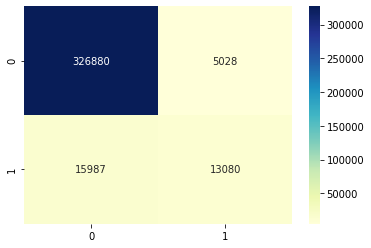

In [15]:
sns.heatmap(cm, cmap= "YlGnBu", annot=True, fmt='')

# SUBMISSION GENERATION

In [48]:
df_test = pd.read_csv('/content/drive/MyDrive/Upskill/project2/data/test.csv')

In [17]:
df_test.head(10)

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...
5,7097325,Let’s see if I understand this; Berkowitz anno...
6,7097326,Our oils read; President IS taking different ...
7,7097327,'Work together'? Dream on. The liberals are al...
8,7097328,What would Jerry Prevo think about that story?...
9,7097329,When wil the indigenous be accountable and t...


In [30]:
#Cleaning
df_test["comment_text"] = [text.lower() for text in df_test["comment_text"]]
df_test["comment_text"] = [clean_contractions(text) for text in df_test["comment_text"]]
df_test["comment_text"] = [clean_special_chars(text) for text in df_test["comment_text"]]
df_test["comment_text"] = [clean_small_caps(text) for text in df_test["comment_text"]]
df_test["comment_text"] = [remove_emojis(text) for text in df_test["comment_text"]]
df_test["comment_text"] = [cleaning(text) for text in df_test["comment_text"]]

In [31]:
df_test.head(10)

,id,comment_text
0,7097320,integr mean that you pay your debt doe thi app...
1,7097321,thi is malfeas by the administr and the board ...
2,7097322,rmiller spoken like a true elitist but look ou...
3,7097323,paul thank you for your kind word i do inde ha...
4,7097324,sorri you miss high school eisenhow sent troop...
5,7097325,let us see if i understand thi berkowitz annou...
6,7097326,our oil read presid is take differ tactic to d...
7,7097327,work togeth dream on the liber are alreadi bus...
8,7097328,what would jerri prevo think about that stori ...
9,7097329,when wil the indigen be account and take respo...


In [32]:
test_features = count_vec.transform(df_test["comment_text"].values.astype(str))

In [43]:
y = Log_Reg.predict(test_features)

In [49]:
df_test['prediction'] = y

In [52]:
for index, rows in df_test[df_test['prediction'] == 1].head(100).iterrows():
  print(index, rows['comment_text'])

6 Our oils read;  President IS taking different tactics to deal with a corrupt malignant, hipoctitical , one way press!
Idiots forget what witnessed them doing during the last election process.
35 The profoundly stupid have spoken.
82 Hey Dallas, Don't let the Iditarod get the best of you.  Do the 2018 race.  Yes, the ITC is a bunch of malicious idiots.  But they will all retire/die soon, long before your career is even half over.  They can't charge you with anything because of the way the rules are for 2017 (the ITC has to prove intent, but they can't).  So get back to training your dogs, win the 2018 race ... and give the senile geezers of the ITC the finger.
83 I can't believe this country was so stupid.. -totally dumbstruck- you get what you get and don't throw a fit!
131 In regard to the "ring wing gun nuts" who haven't shot anyone . . . consider the gun nut Bundy followers who in 2014 shot and killed two police officers in Las Vegas:

"The Las Vegas Sun reported that residents of

In [51]:
for index, rows in df_test[df_test['prediction'] == 0].head(100).iterrows():
  print(index, rows['comment_text'])

0 [ Integrity means that you pay your debts.]

Does this apply to President Trump too?
1 This is malfeasance by the Administrator and the Board.  They are wasting our money!
2 @Rmiller101 - Spoken like a true elitist. But look out bud. The re-awakening in Europe, Brexit and now the Trump victory are just the beginning. The unwashed masses are coming for you and your ilk….
3 Paul: Thank you for your kind words.  I do, indeed, have strong beliefs and don't hide them.  They are based on both facts and values.  I think the question of "bias" and "prejudice" comes into play when we're discussing beliefs and attitudes based on values.  One of our poster friends,  for example, often comments that being "intolerant" of a bias, for example, is, in itself, a bias.  This is, IMO, where the concept of "irratonal antipathy" is important.  If I dislike neo-Nazis because of their views on race, my antipathy is based on fact (knowledge of their views) and values (my belief that condemning others becau

In [40]:
df_test.drop(columns='comment_text').to_csv('/content/drive/MyDrive/Upskill/project2/data/train_clean.csv', index=False)